# Week 6<br>Web Scraping

Oct 10, 2022

## Housekeeping

- Homework #3 (required) due a week from today (10/17)
- Homework #4 will be assigned next week
- You must complete one of homeworks #4, #5, and #6
- Final project due at the end of the final period...more details soon

## The roadmap

- Last time: APIs, Census data, Twitter
- Today: web scraping
- Next: big data, geo data science in the wild, machine learning, interactive web maps, dashboarding & web servers

The final project will ask you to combine several of these topics/techniques to analyze a data sets and produce a web-based data visualization

## Today: web scraping

- Why web scraping? 
- Getting familiar with the Web
- Web scraping: extracting data from static sites
- How to deal with dynamic content

In [54]:
# Start with the usual imports
# We'll use these throughout
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## What is web scraping? 


Using software to gather and extract data/content from websites

## Why is web scraping useful? 

- Not every data source provides an API
- The Web contains **a lot** of information
- Unique data sources that may not be available elsewhere

## What is possible: 11 million rental listings from Craigslist


<center>
<img src=attachment:01-craigslist-rental-housing-listings-us-map.jpg width=700></img>
</center>

[Source: Geoff Boeing](https://geoffboeing.com/2016/08/craigslist-rental-housing-insights/)
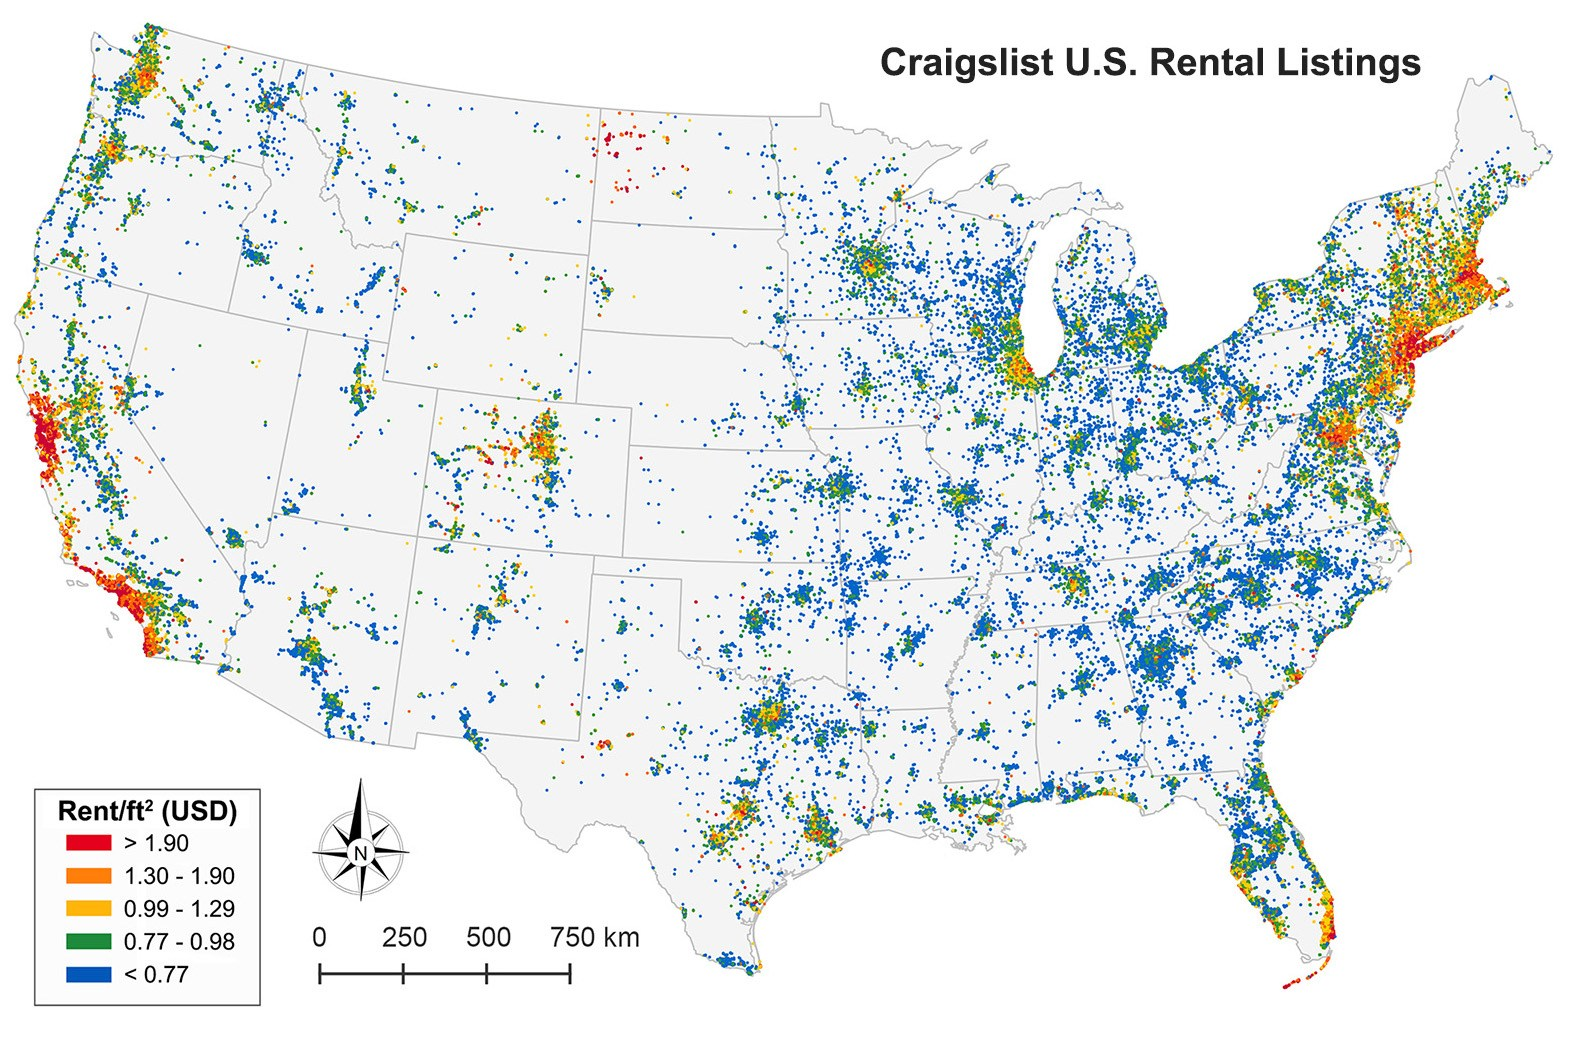

## Why isn't web scraping incredibly popular?

- It can be time consuming and difficult to extract large volumes 
- You are at the mercy of website maintainers — if the website structure changes, your code breaks
- Most importantly, there are ethical and legal concerns

<center>
    <img src=attachment:Screen%20Shot%202019-03-12%20at%208.42.41%20PM.png width=700></img>
</center>
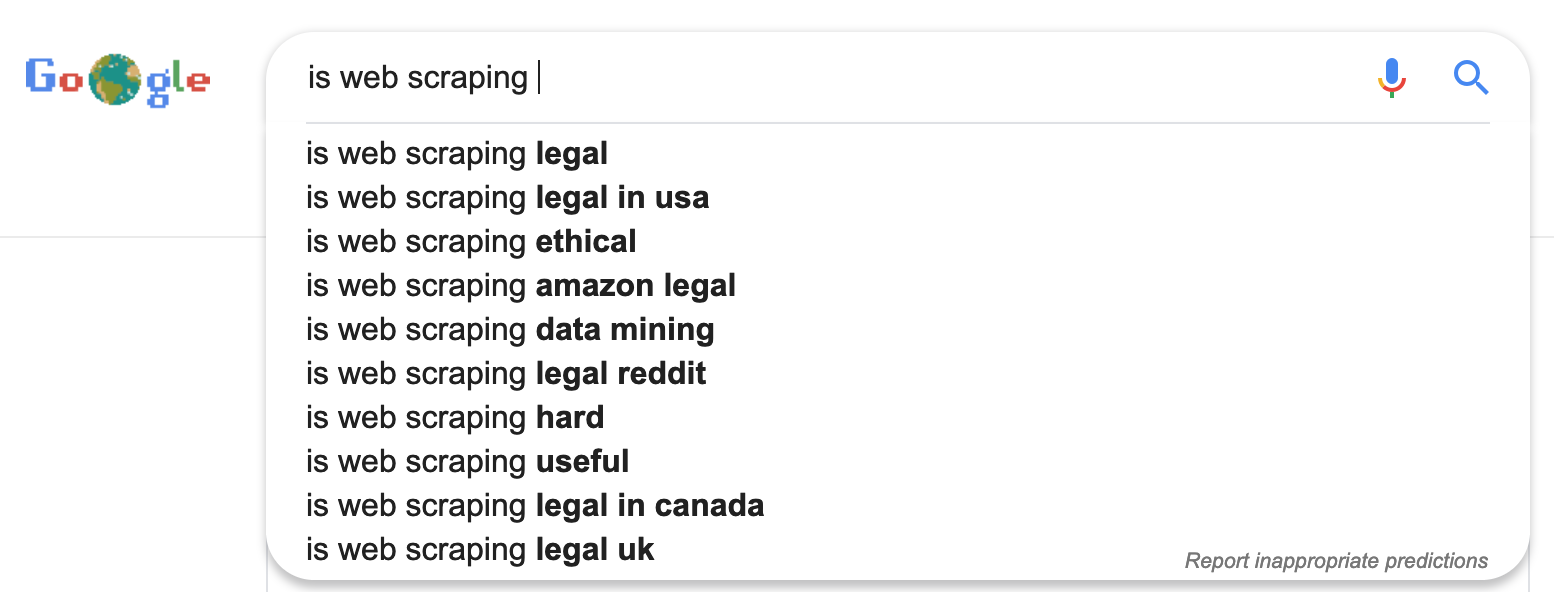

## Legal concerns

RadPad scraped the entirety of Craiglist, Craigslist sued RadPad, and they were [awarded $60 million](http://labusinessjournal.com/news/2017/apr/14/radpad-ordered-pay-605-million-judgment-craigslist/)

<center>
<img src=attachment:Picture1.png width=500></img>
</center>
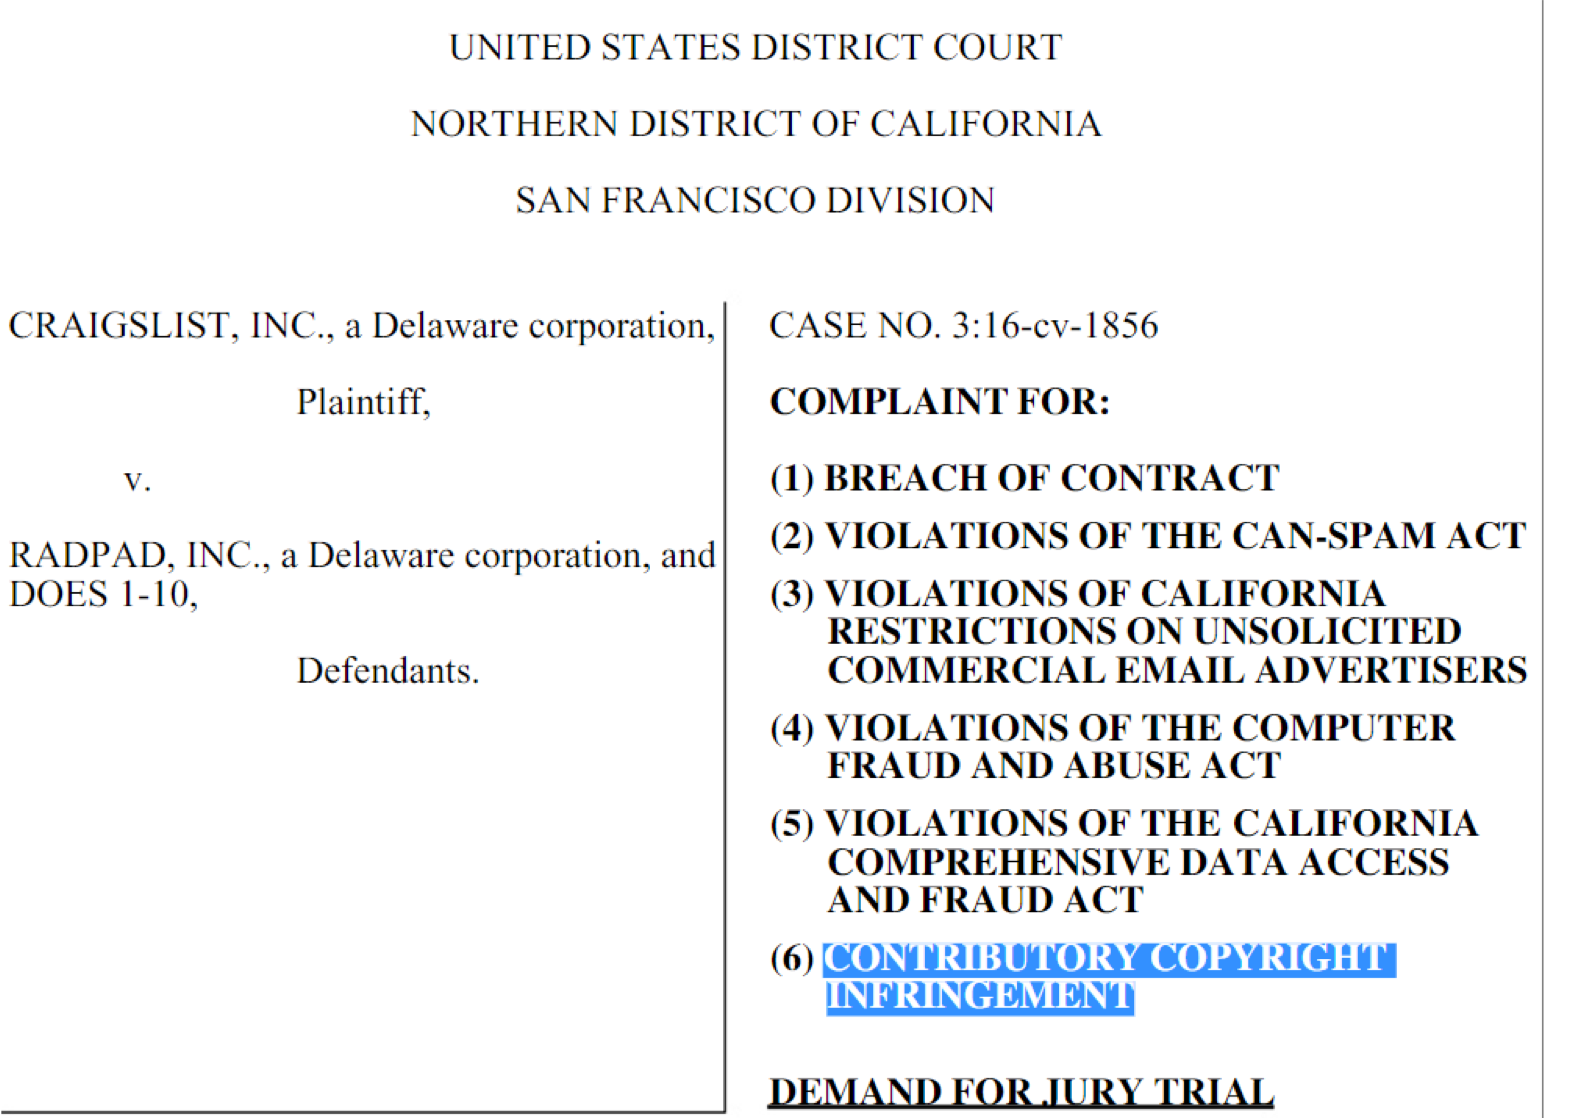

## Two types of legal issues

1. Copyright infringement
    - For example: pictures, rental listing text
2. Terms of Use violations
    - **Unauthorized**: Is scraping prohibited in the website’s terms of use?
    - **Intentional**: Was the person aware of the terms? Did they check an “I agree to these terms” box?
    - **Causes damage**: Did the scraping overload the website, blocking user access?


## When is web scraping probably okay?

- .gov sites and, to a lesser degree, .edu sites
- Website owner has no business reason to protect the information
- Not prohibited in terms of use
- Limited number of requests
- Not too many requests all at once
- Done at night, when web traffic is low


## When is it less likely to be okay?

- search engines
- E-commerce sites (e.g. Zillow, Expedia, Amazon)
- Social media
- Prohibited in terms of use
- Large number of requests
- High frequency of requests

## With that being said, let's do some web scraping

## A primer on Web definitions

So many acronyms:

- HTML
- The DOM
- CSS

## HTML: HyperText Markup Language

- The language most websites are written in
- The browser knows how to read this language and renders the output for you
- HTML is what a web crawler will see

## HTML tags

- There are a standard set of tags to define the different structural components of a webpage
- For example: 
    - `<h1>`, `<h2>` tags define headers
    - `<p>` tags define paragraphs
    - `<ol>` and `<ul>` are ordered and unordered lists

## Jupyter notebooks can render HTML

Use the `%%html` magic cell command

In [4]:
%%html

<html>
  <head>
    <title>TITLE GOES HERE</title>
  </head>
  <body>
    <h1>MAIN CONTENT GOES IN THE BODY TAG</h1>
    <p>This is a paragraph tag</p>
    <p>This is a second paragraph tag</p>
  </body>
</html>

## HTML: elements, tags, and attributes

Learning the notation:

In [7]:
%%html

<a id="my-link" style="color: orange;" href="https://www.design.upenn.edu" target="blank_">This is my link</a>

**The element:** 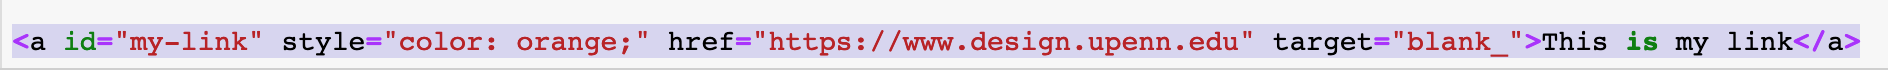

**The tag:**
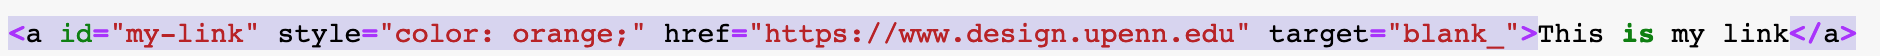

**The attributes:**

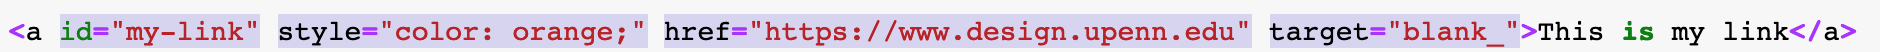

## Some attributes have special meaning

- In particular: `id` and `class`
- Allows you to: 
    - select and manipulate specific elements
    - apply styling to specific types of elements

## CSS: Cascading Stylesheets

- A language for styling HTML pages
- CSS styles (also known as selectors) are applied to HTML tags based on their name, class, or ID.

<center>
    <img src=attachment:Screen%20Shot%202019-03-12%20at%209.30.19%20PM.png width=1200></img>
</center>
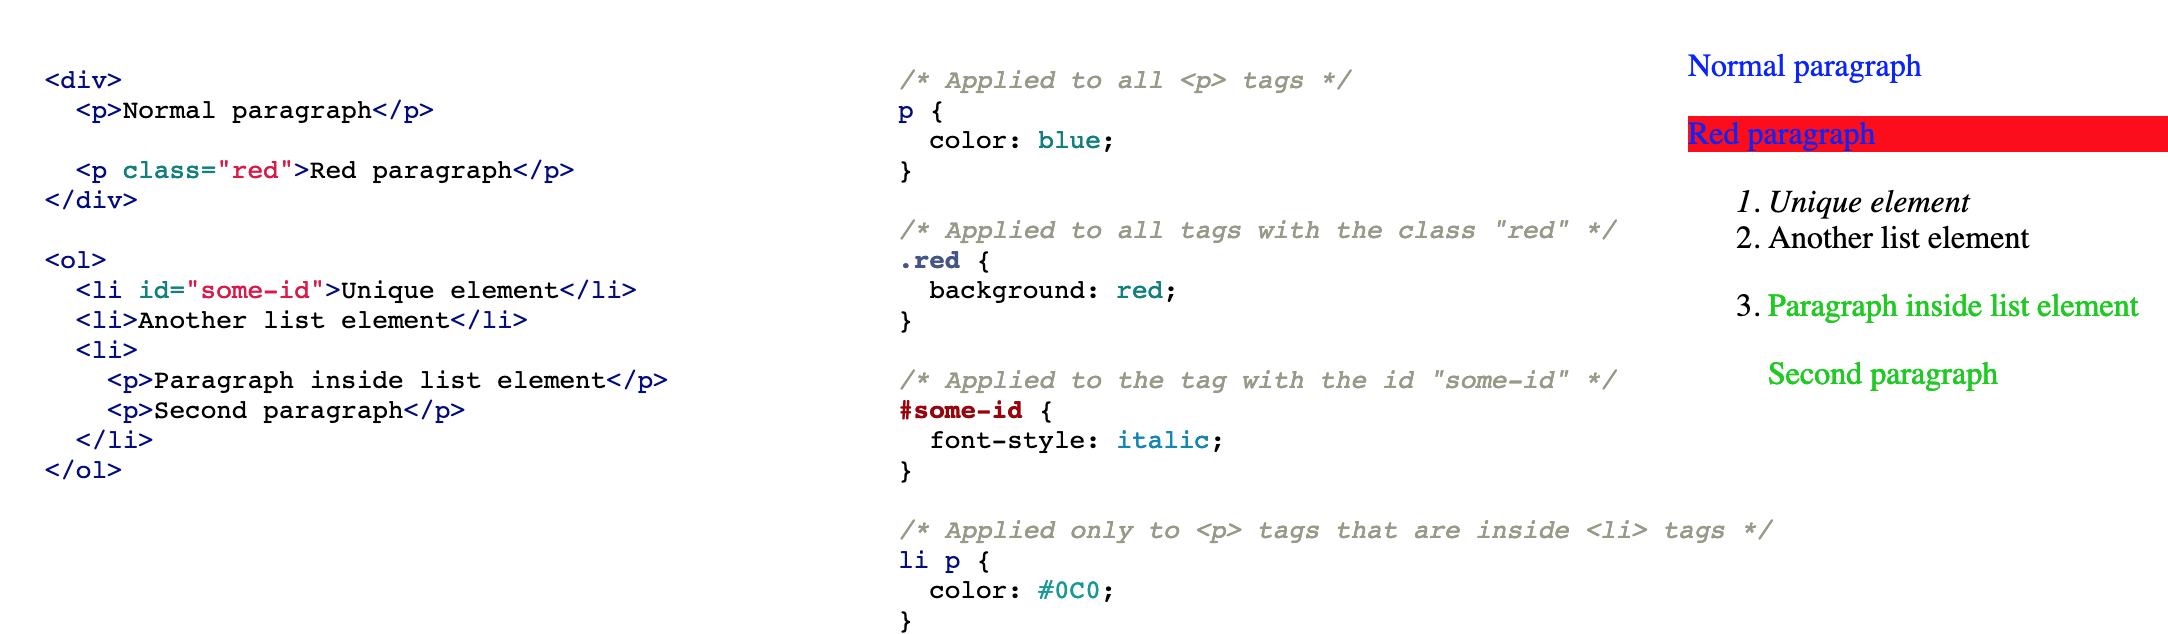

## Basic Web selectors

- Class
    - e.g., `.red`
- ID
    - e.g., `#some-id`
- Tag
    - e.g., `p`, `li`, `div`

- **IDs:** unique identifiers
    - no two elements on a page will have the same ID.
- **Classes:** not unique
    - many elements will have the same class
    - a single element can have multiple classes

And many more: look up the syntax when you need it

https://www.w3schools.com/cssref/css_selectors.asp

## Finally: dynamic content

## The DOM: Document Object Model

- An interactive object tree created from the HTML tag hierarchy on a page
- Created by the browser
- Tracks user interactions
- It is **dynamic**: stores the current state of the webpage 

## Step 1: Inspecting a webpage

- Modern web browsers provide tools for inspecting the source HTML and DOM of websites
- Also tells you data sources that have been loaded by the page
- This should also be your first step when starting to scrape a page

**Simply hit F12 to load the Web Inspector**

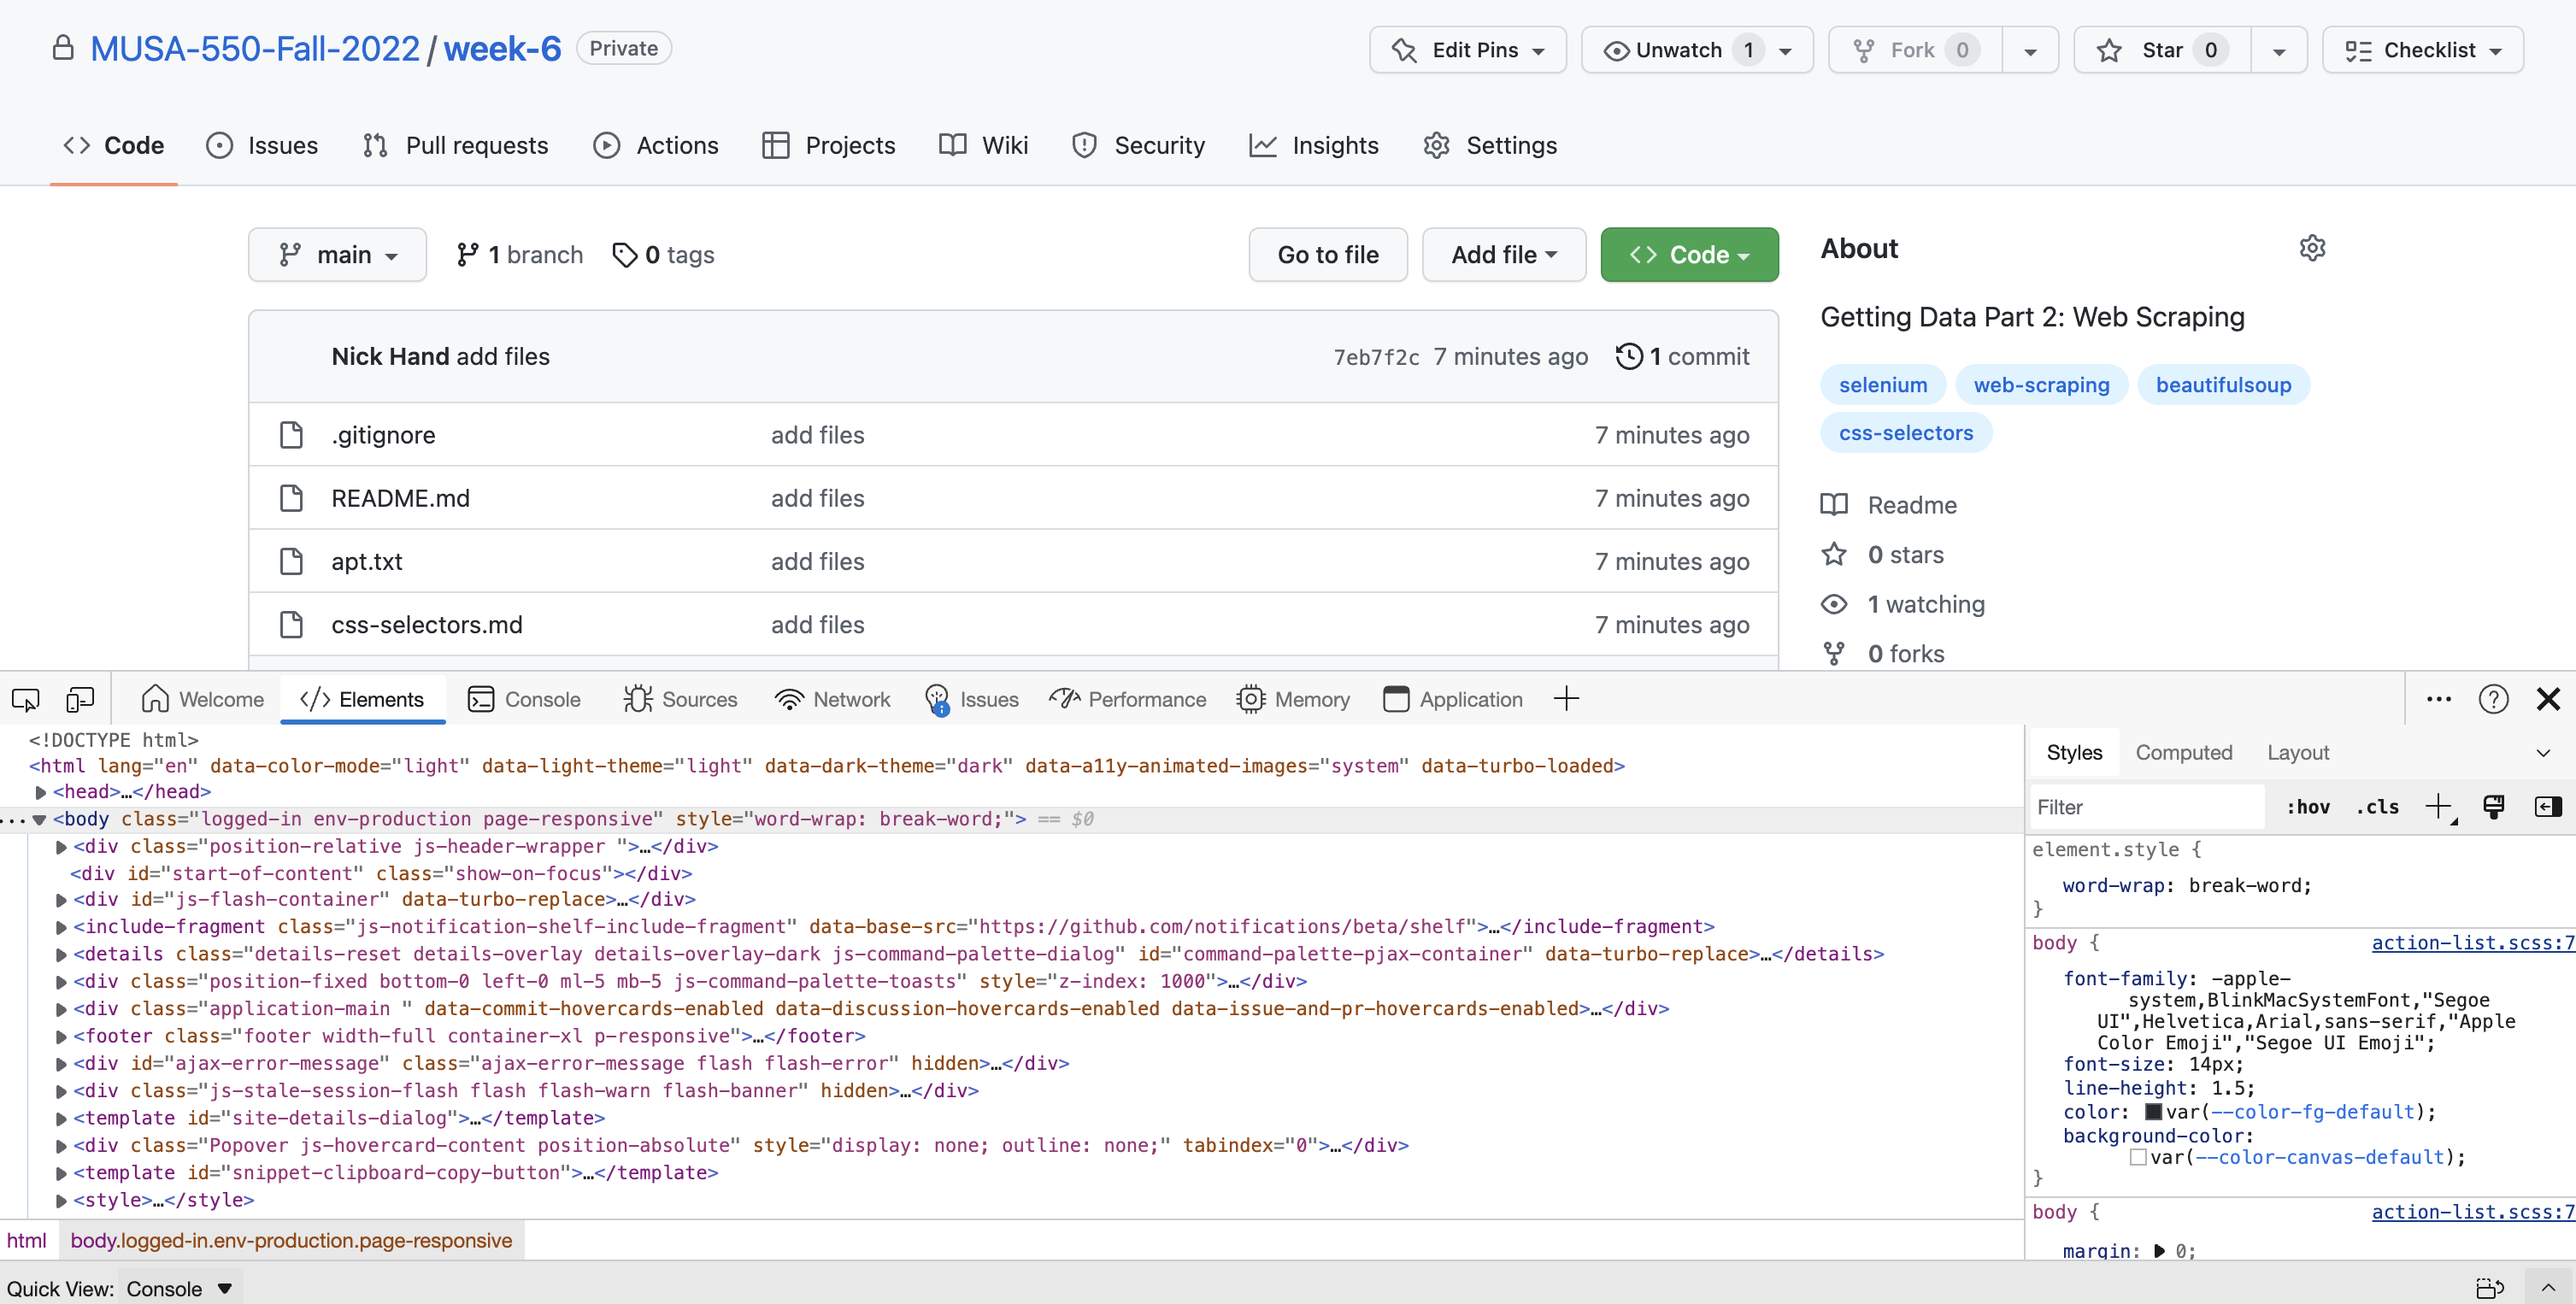

## The Elements tab

- Allows you to inspect the DOM directly
- The tool that will allow you to identify what data you want to scrape from a website

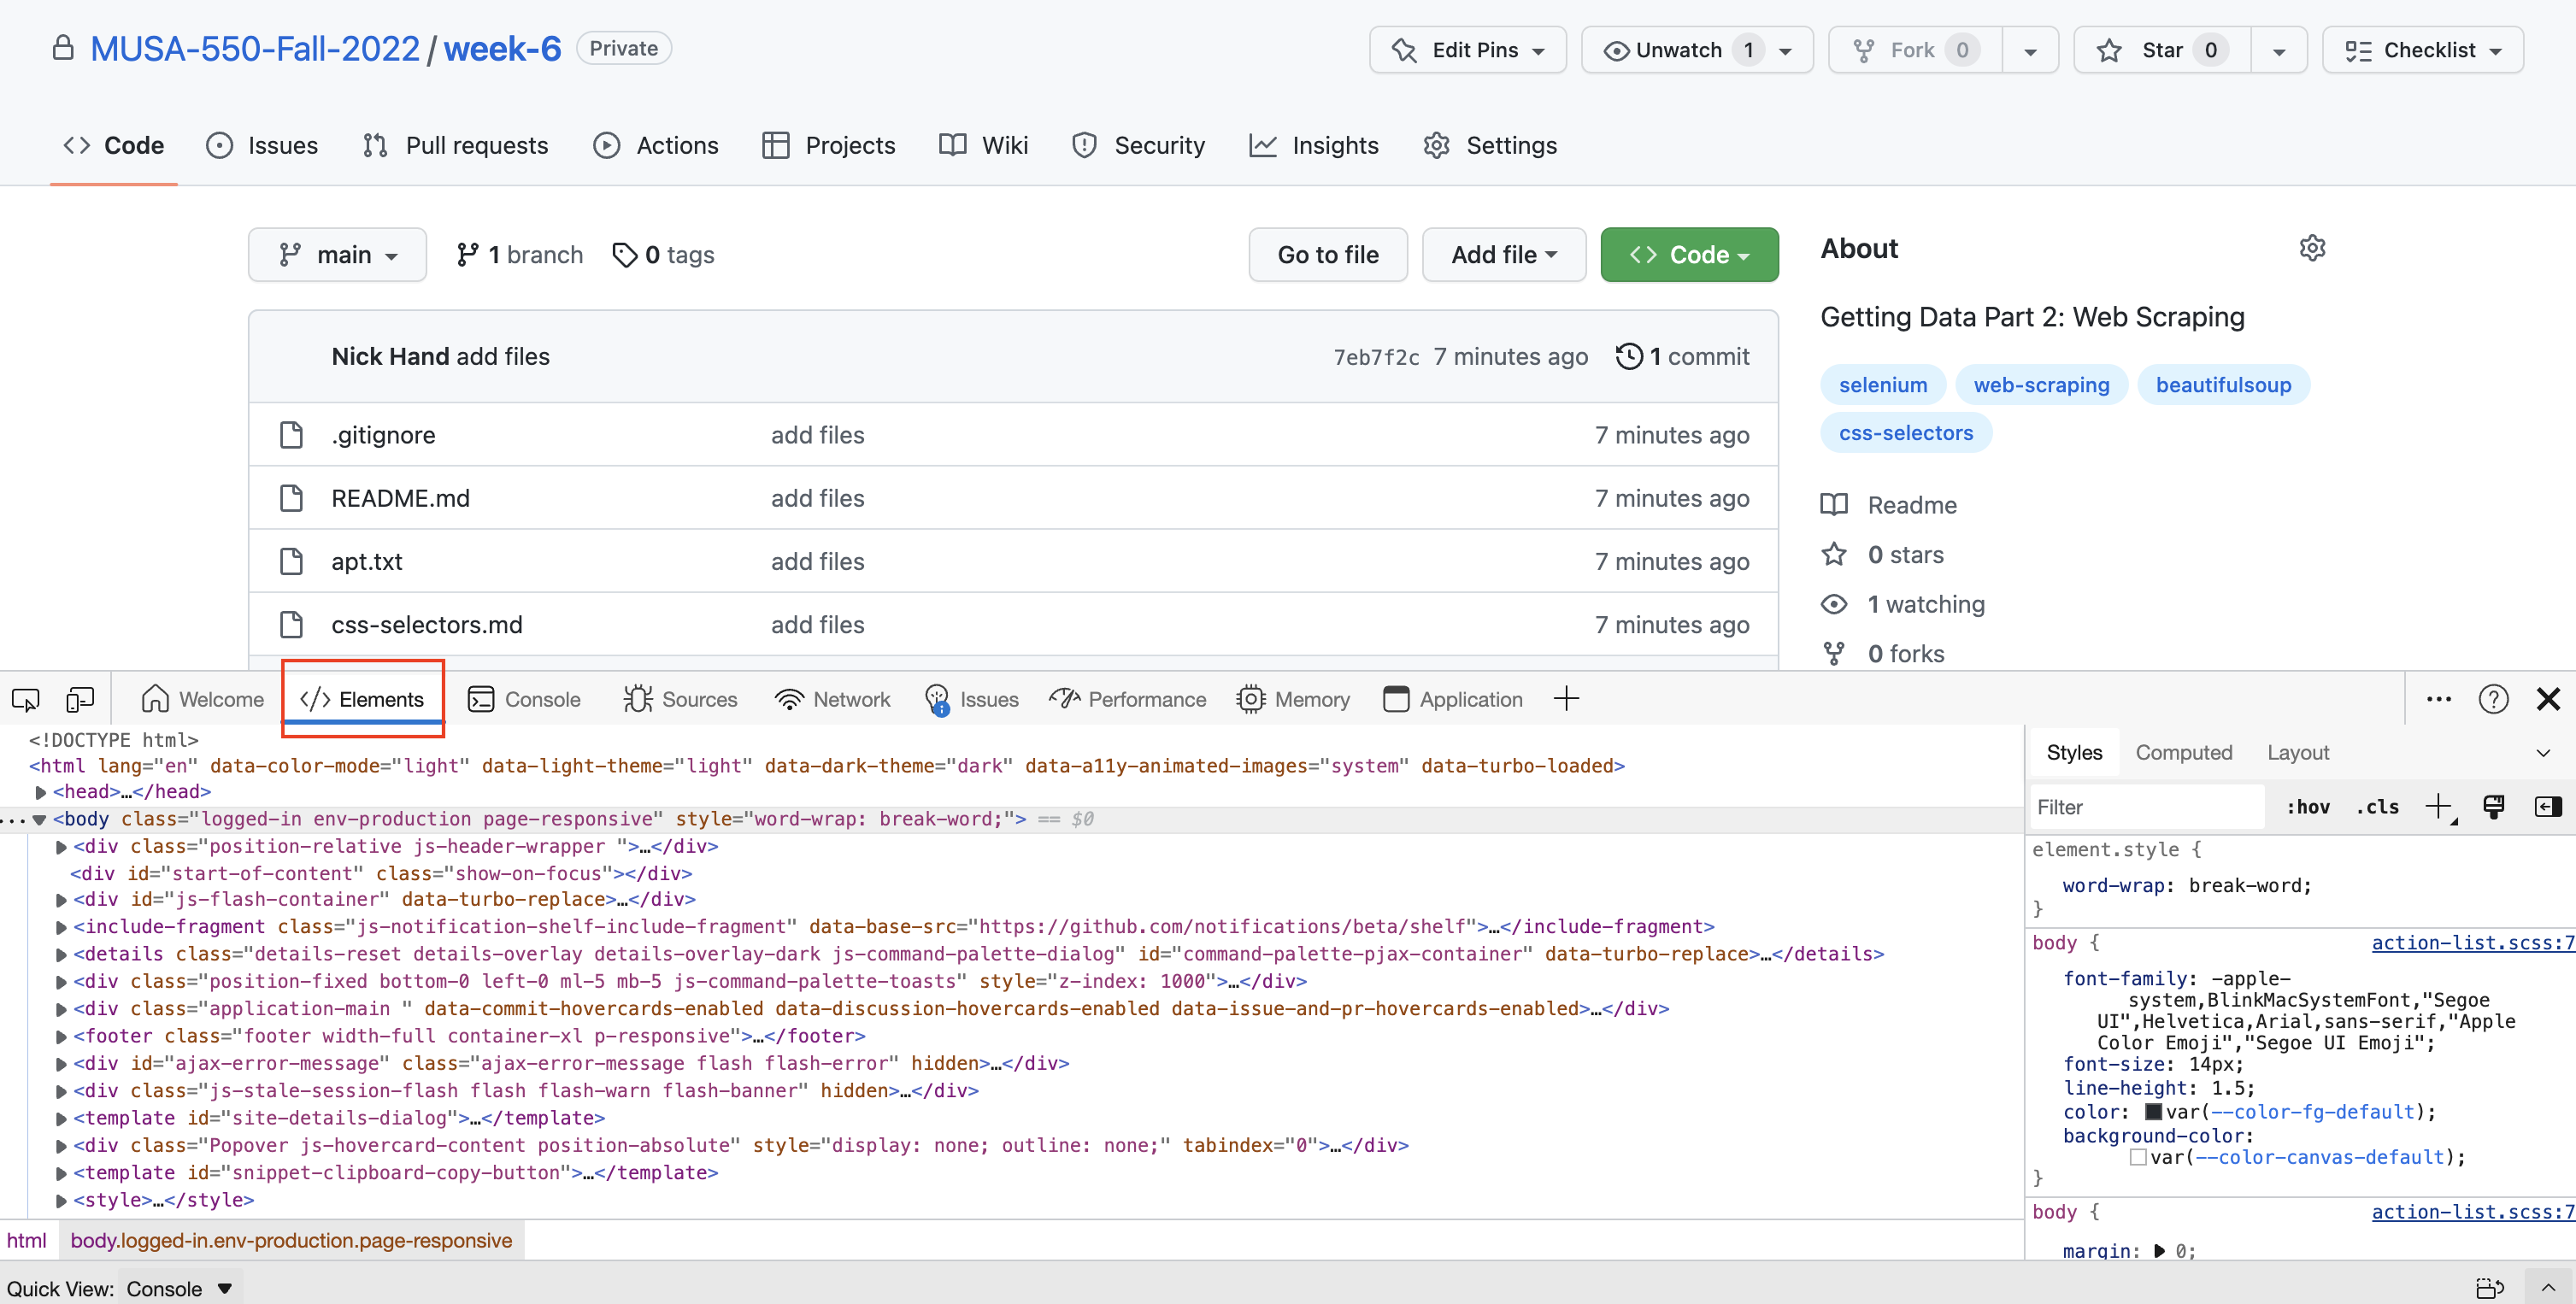

## The Elements tab

1. Right click on the element you want to view
2. Click on "Inspect"
3. The element will be highlighted in the DOM (in the Elements tab)

## The Network Tab

- Shows you all files downloaded by the webpage after the HTML loaded (FYI: these are called AJAX requests)
- Select either `JS` or `XHR` (XML HTTP requests)

**Usually looking for `.json` files for GeoJSON data**

## Example 1: [The Prisons Census in Philadelphia](https://www.phila.gov/departments/philadelphia-department-of-prisons/daily-headcount-and-census/)

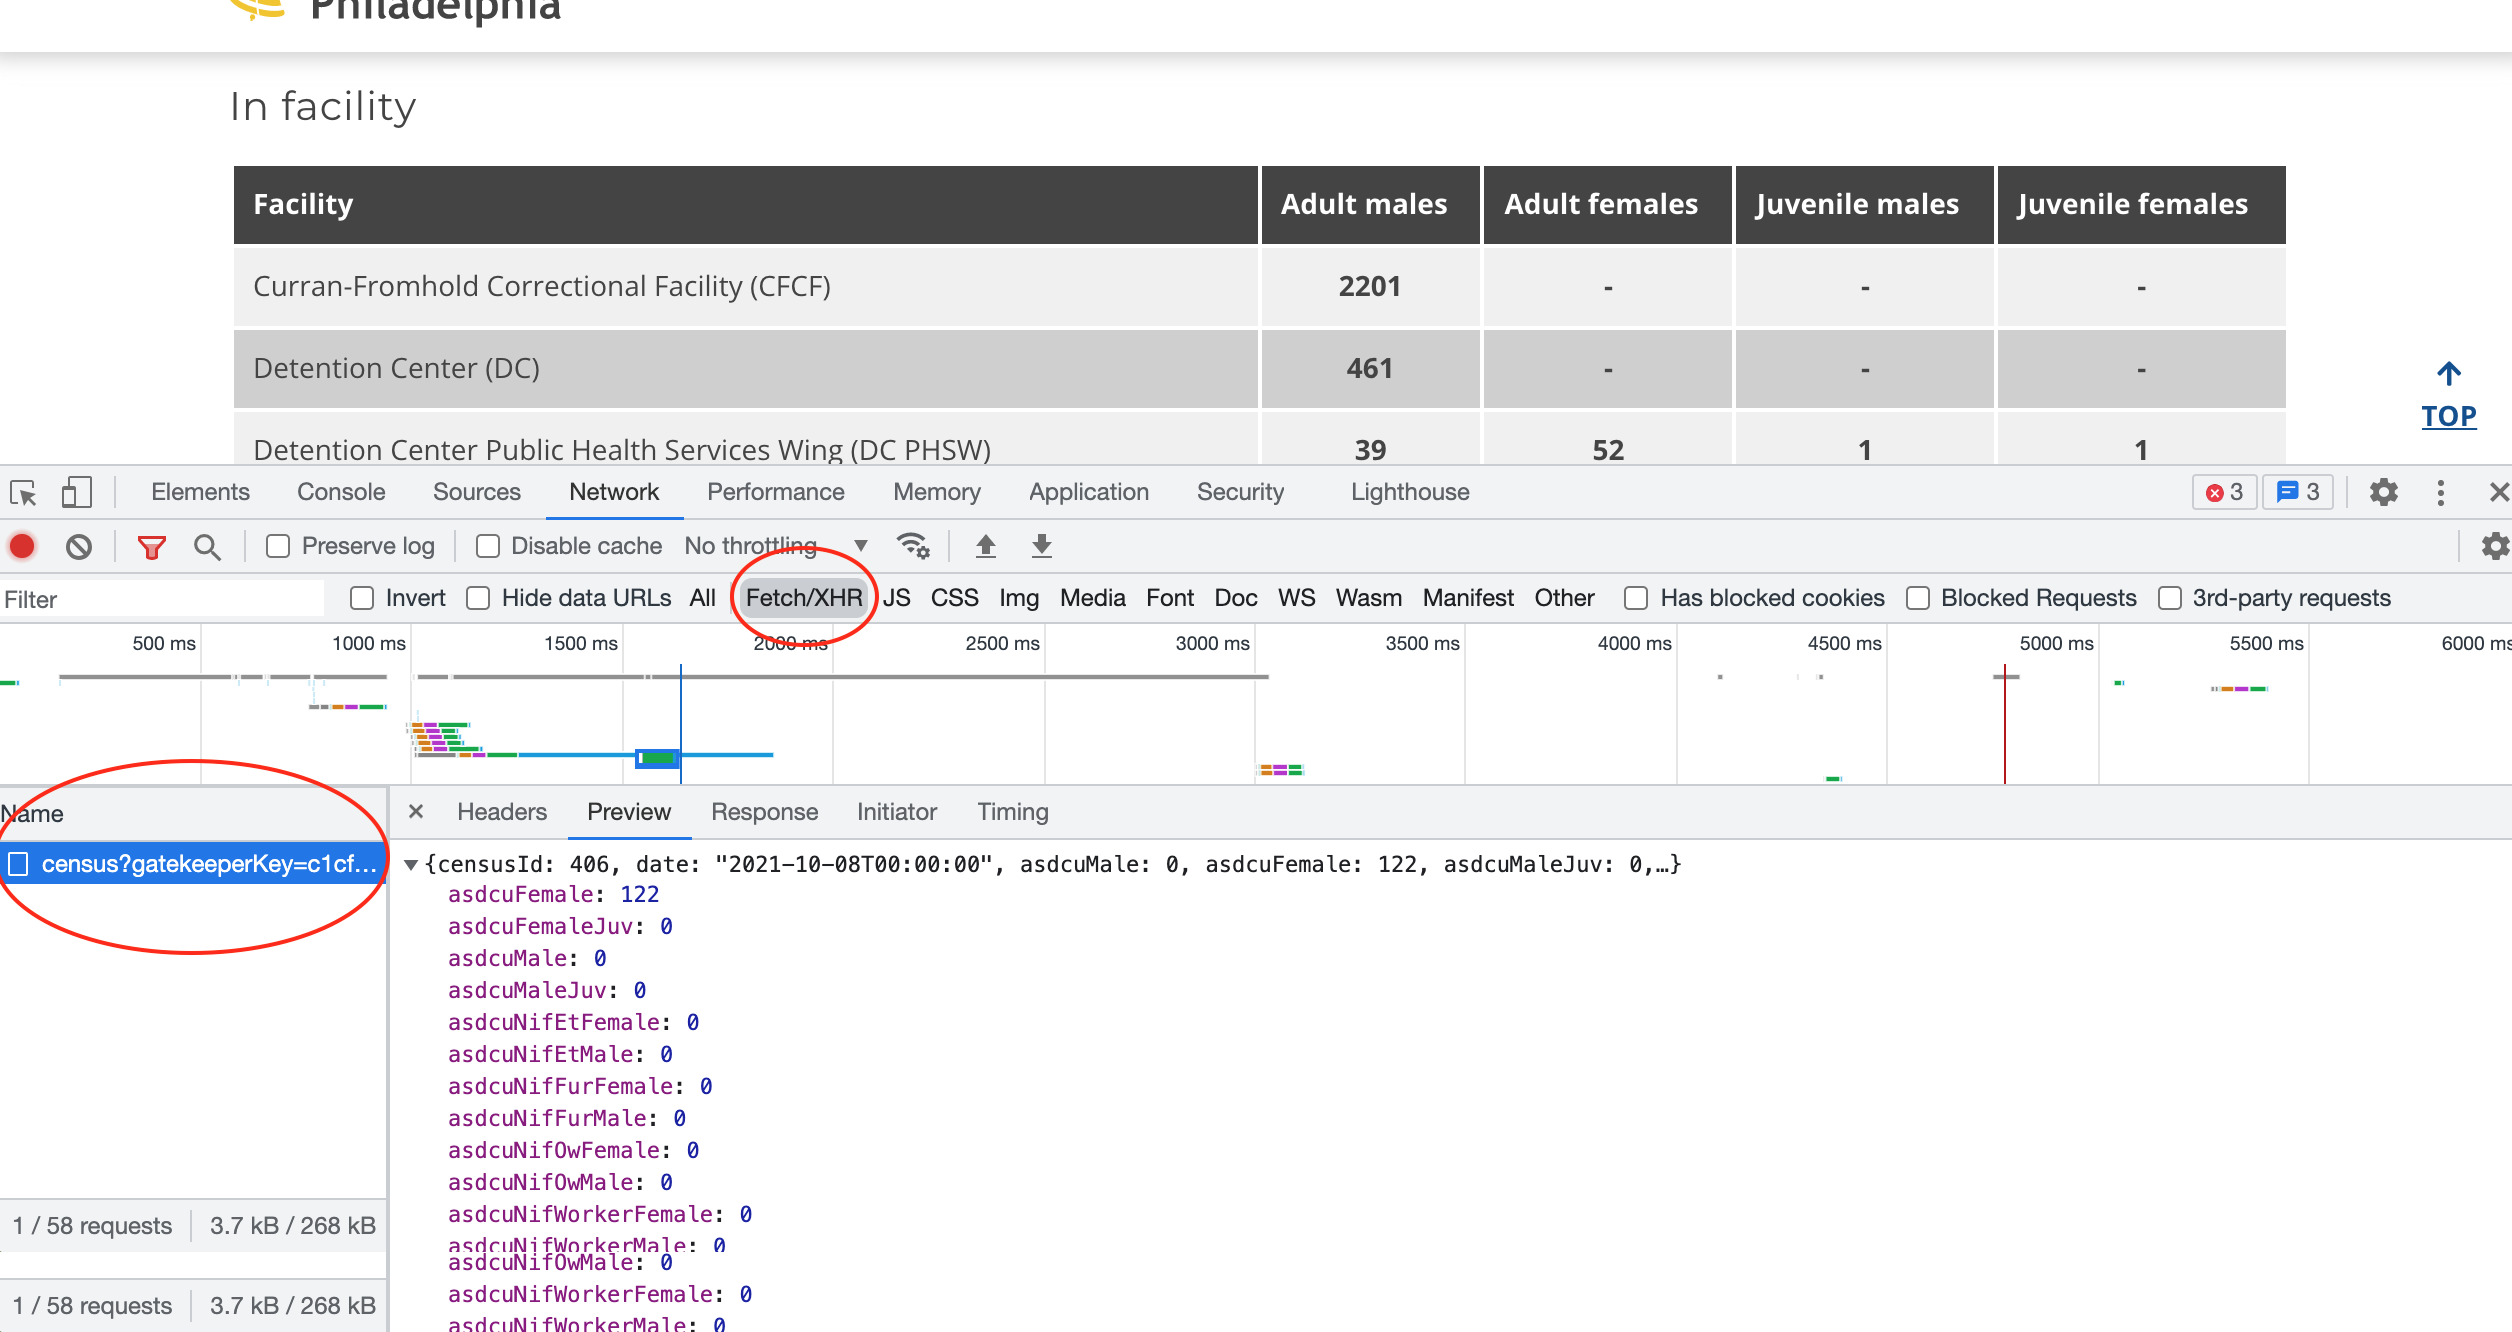

## Example 2: [Measles data from the WSJ](http://graphics.wsj.com/infectious-diseases-and-vaccines/)

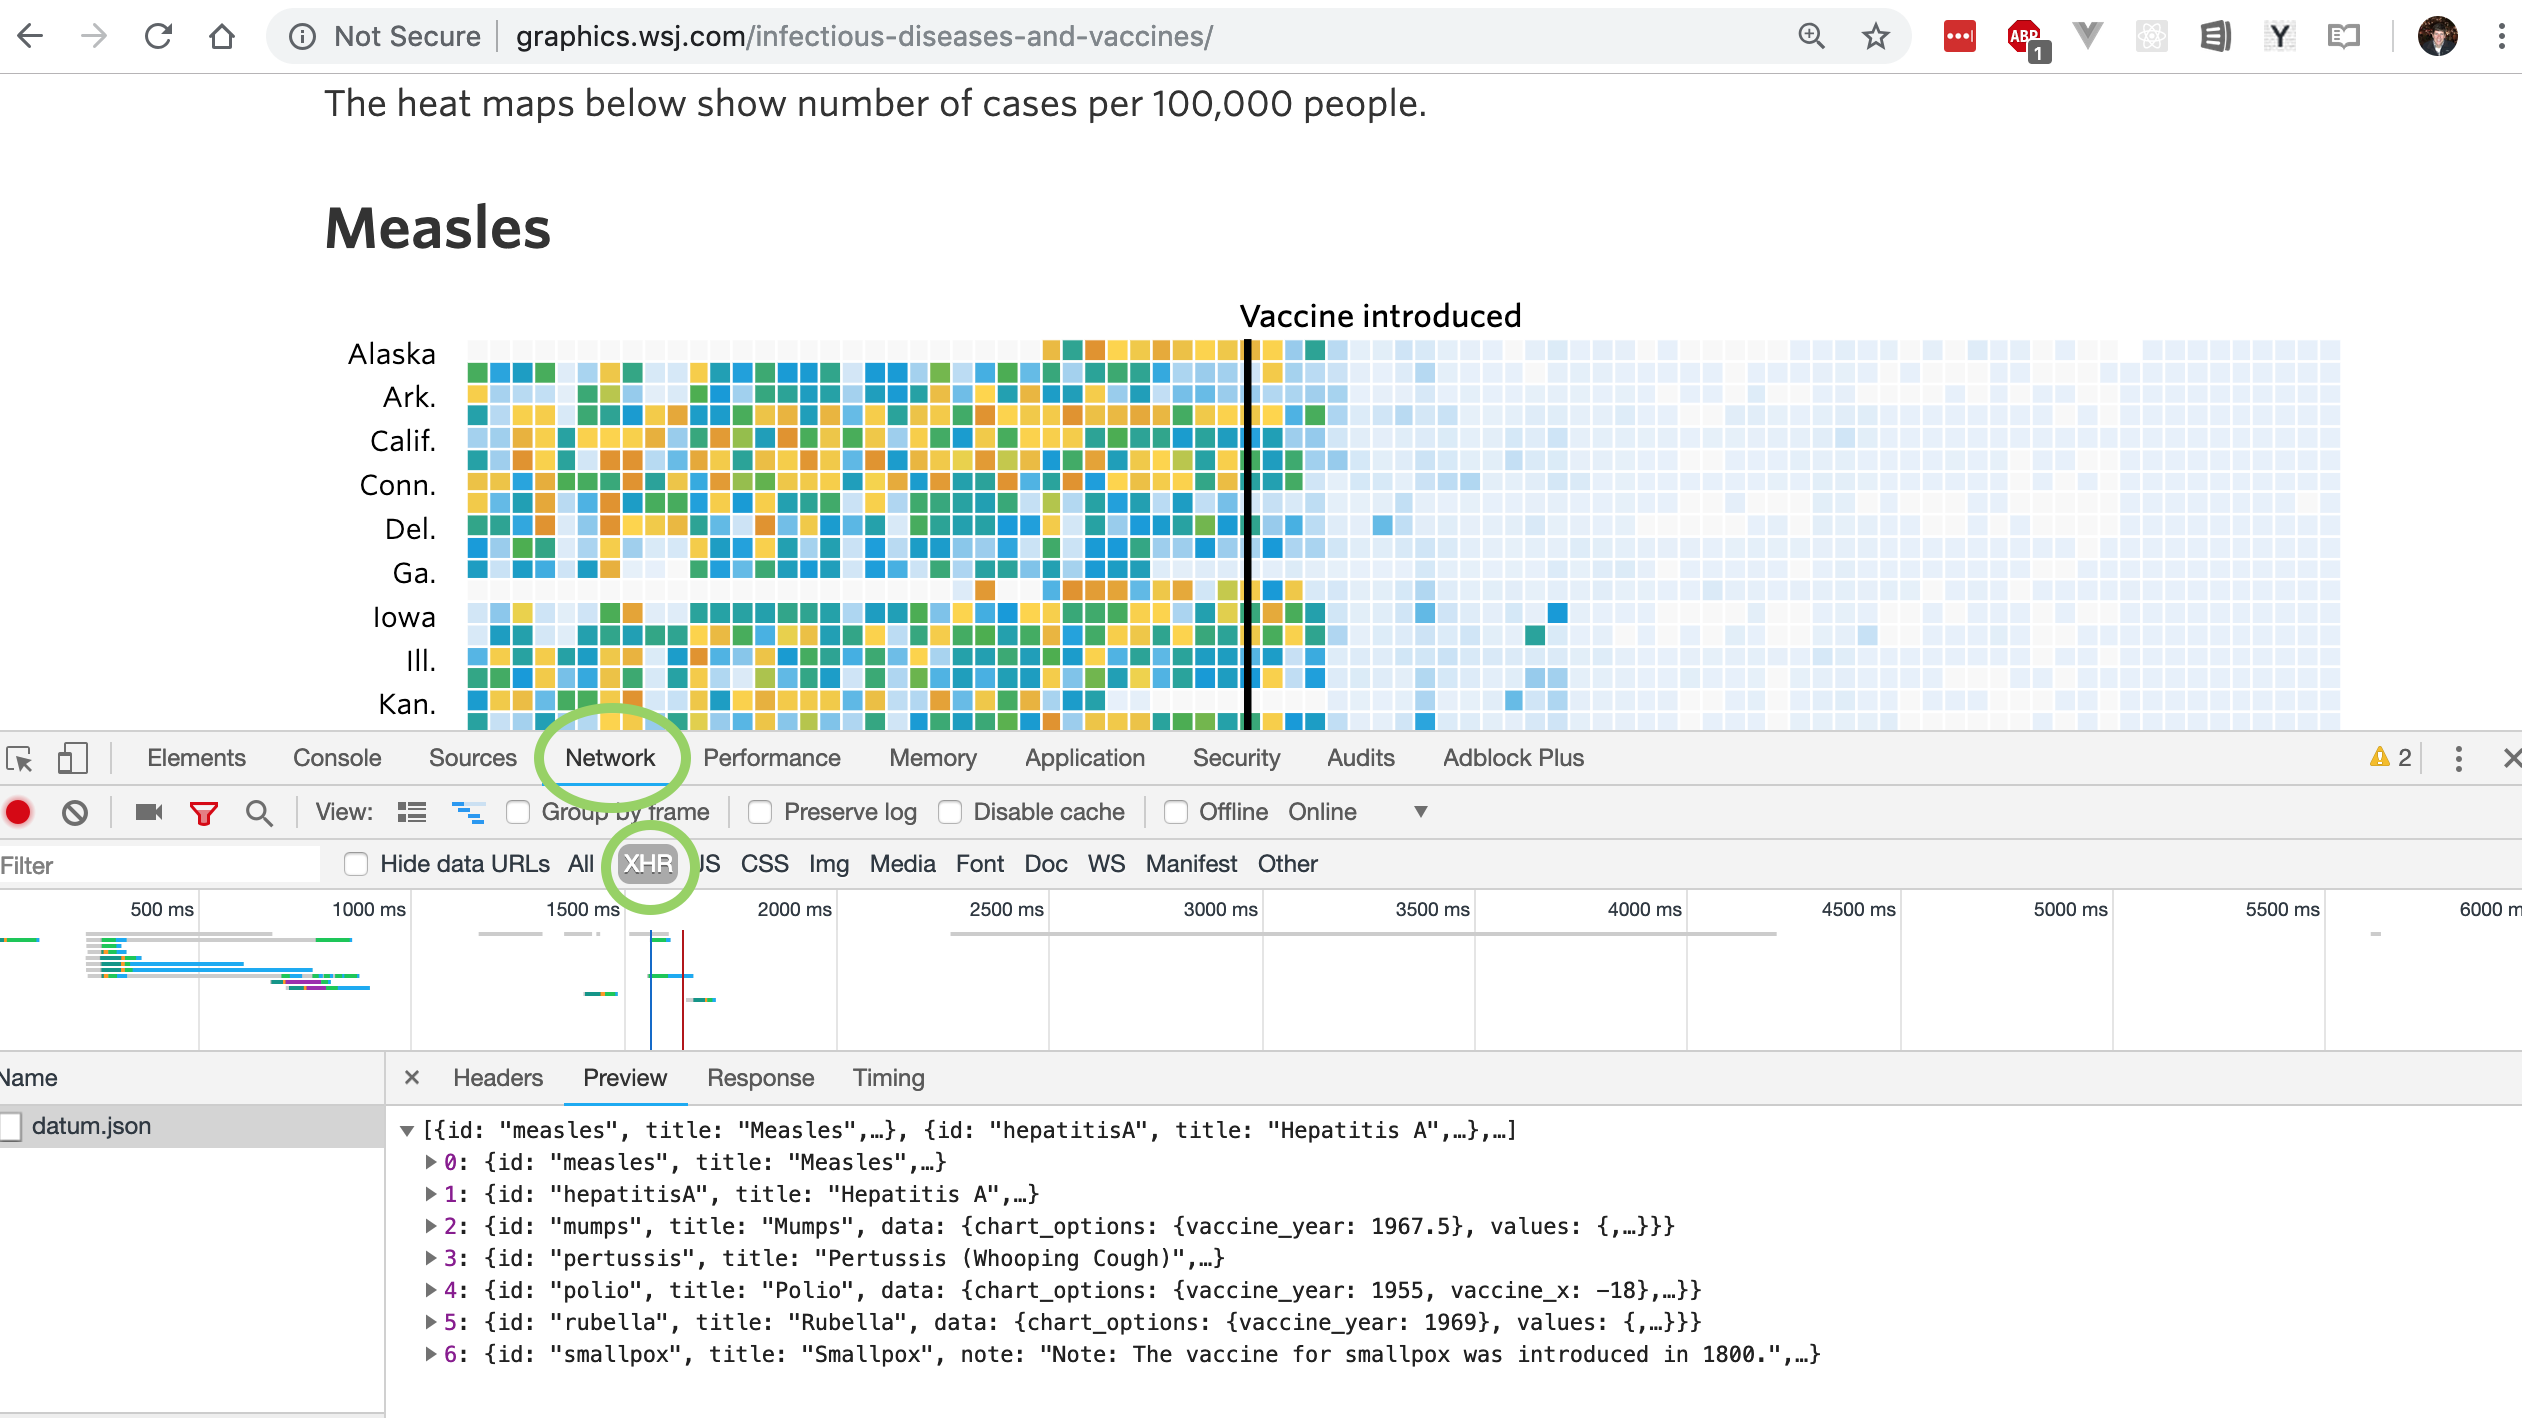

In [9]:
import json

In [12]:
measles_data = json.load(open("/Users/nhand/Downloads/datum.json"))

## Example: Let's explore [All Sides](https://www.allsides.com/media-bias/media-bias-ratings)

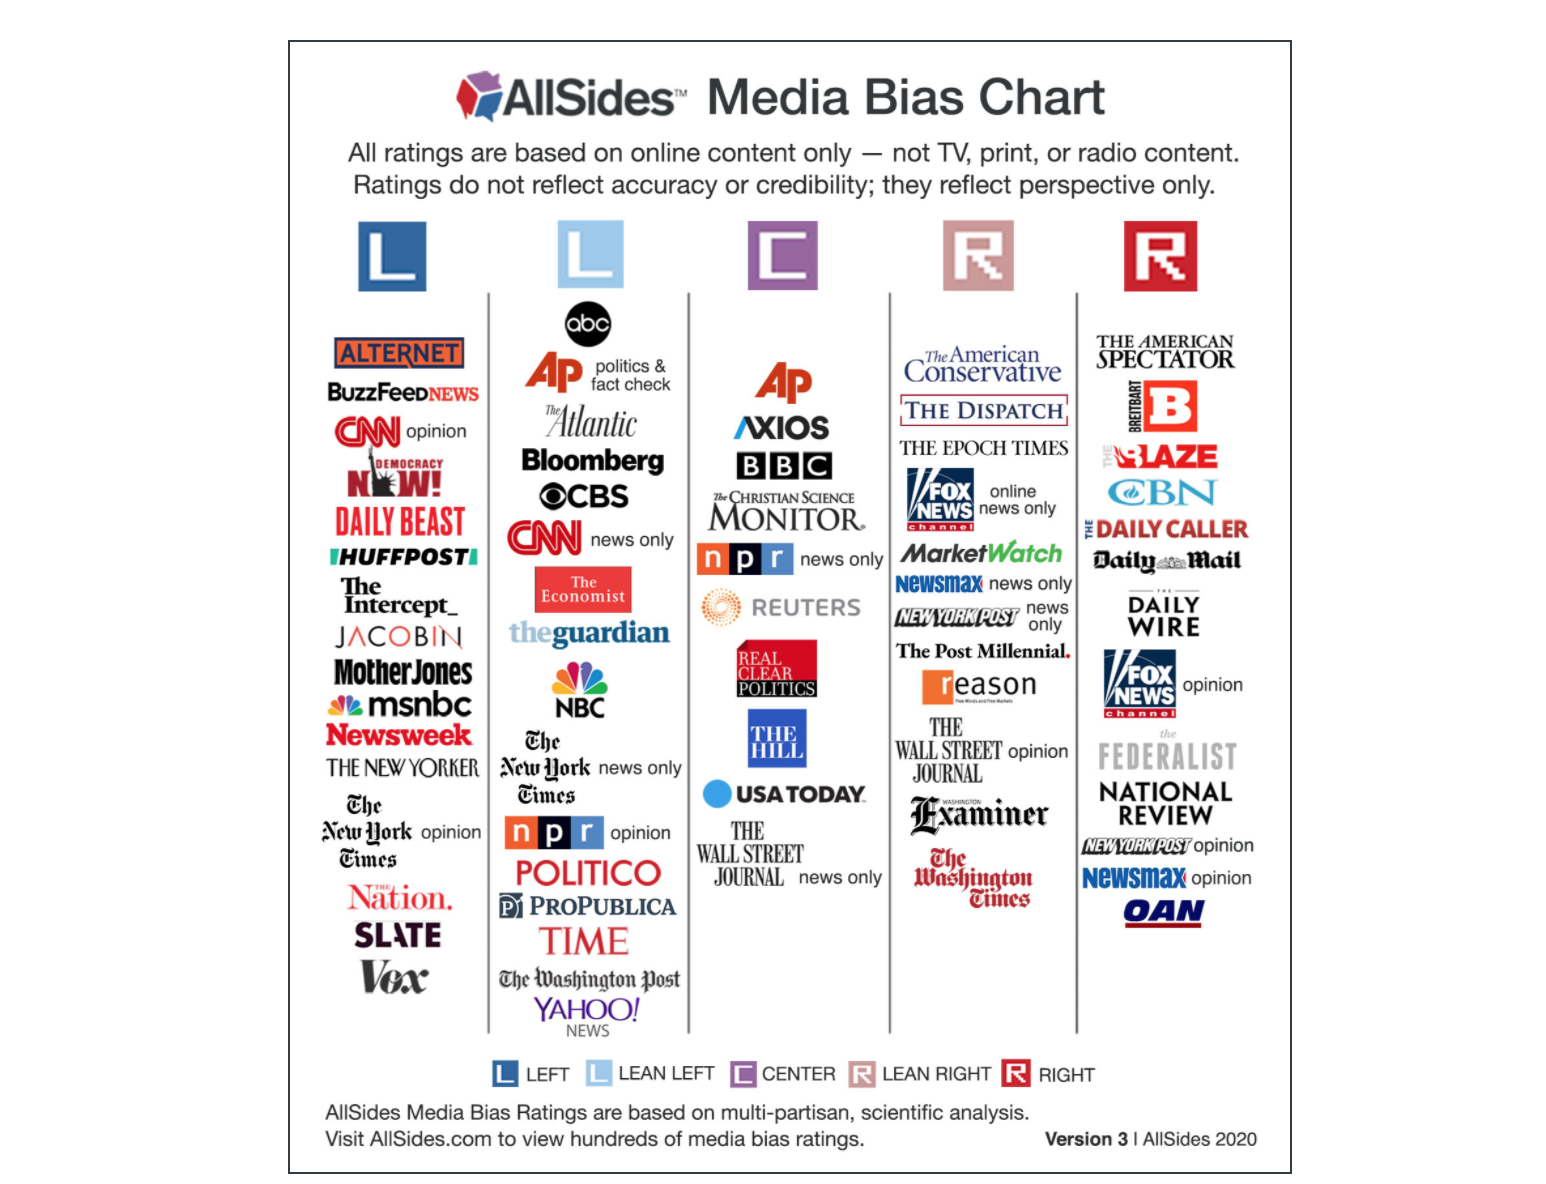

## Getting the HTML content

In [18]:
import requests

In [24]:
url = 'https://www.allsides.com/media-bias/ratings'
r = requests.get(url)


In [25]:
r.status_code

200

## BeautifulSoup makes this much more manageable

In [27]:
from bs4 import BeautifulSoup

In [28]:
soup = BeautifulSoup(r.content, 'html.parser')

## Making the HTML "pretty"

In [29]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"/>
  <link href="https://www.allsides.com/sites/default/files/AllSides-Icon.png" rel="shortcut icon" type="image/png"/>
  <meta content="555035668344688" property="fb:app_id"/>
  <meta content="What’s the bias of your favorite media outlet? See over 800 AllSides media bias ratings." name="description"/>
  <meta content="media bias ratings chart, media bias ratings allsides, news media bias ratings, media outlet bias ratings, media bias ratings website" name="keywords"/>
  <link href="https://www.allsides.com/media-bias/ratings" rel="canoni

This is what you'll see if you use the Web Inspector

## How to extract the content we want?

**Two important functions**

1. `soup.select_one(selector)`: finds the first element matching the selector query and returns **one** element
1. `soup.select(selector)`: finds **all** elements matching the selector 

**Recommended reading:** Note on beautiful soup and css selectors in [this week's repository](https://github.com/MUSA-550-Fall-2022/week-6/blob/master/css-selectors.md)

## To the Web Inspector!

We need to select all `<tr>` tags inside the `<tbody>` tag. 

## Let's select the first `<tr>` tag

Web browsers will let us copy the CSS selector for individual elements.

Use: **Right Click > Copy > Copy Selector**

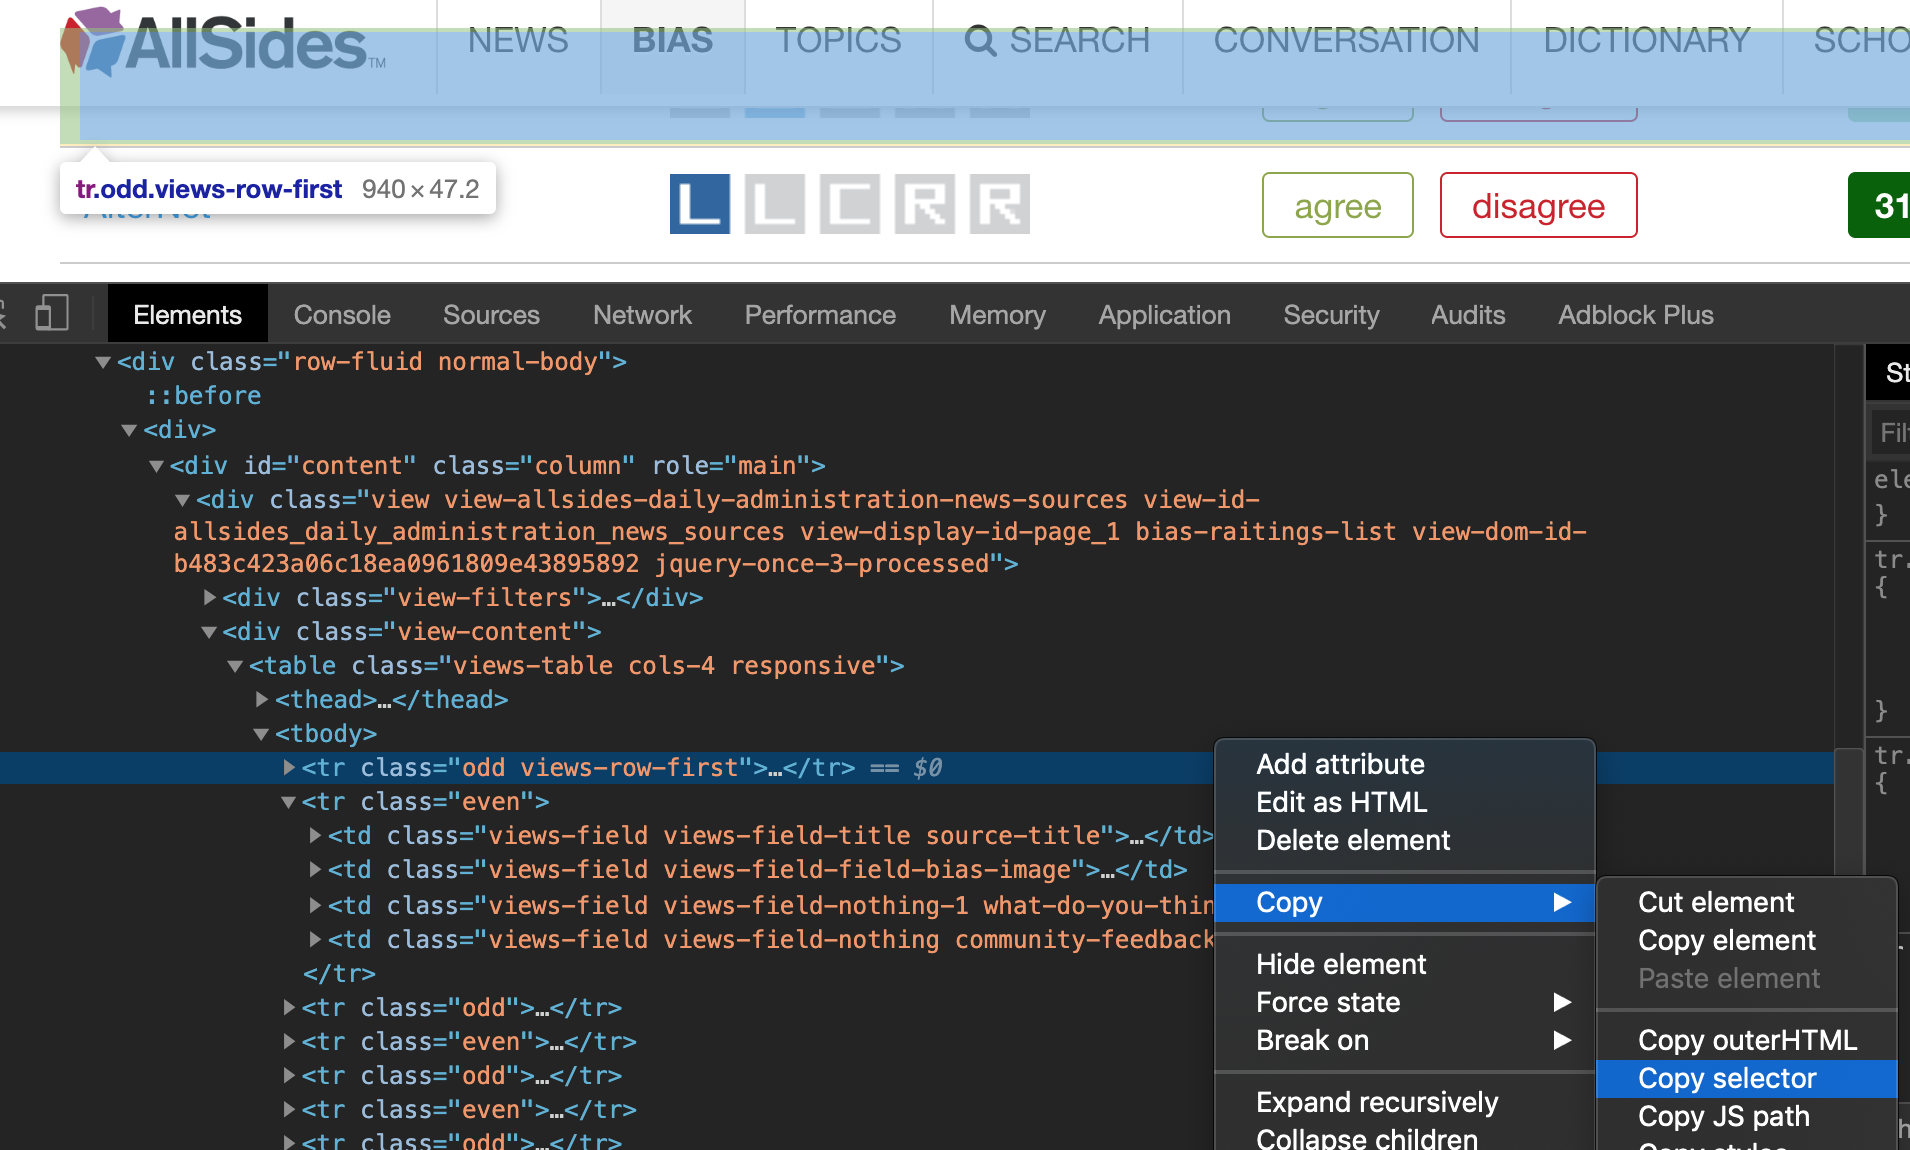

In [30]:
selector = "#content > div > div.view-content > table > tbody > tr.odd.views-row-first"

In [36]:
# Select the first row
first_row = soup.select(selector)

In [37]:
first_row[0]

<tr class="odd views-row-first">
<td class="views-field views-field-title source-title">
<a href="/news-source/abc-news-media-bias">ABC News (Online)</a> </td>
<td class="views-field views-field-field-bias-image">
<a href="/media-bias/left-center"><img alt="AllSides Media Bias Rating: Lean Left" height="20" src="https://www.allsides.com/sites/default/files/styles/bias120x20/public/bias-leaning-left.png?itok=F7AE1uLT" title="AllSides Media Bias Rating: Lean Left" typeof="foaf:Image" width="120"/></a> </td>
<td class="views-field views-field-nothing-1 what-do-you-think">
<div class="agree-disagree-widget"><div class="rate-widget-4 rate-widget clear-block rate-average rate-widget-yesno rate-f13adc4a6caee57d894f9d7ef192d7f3 rate-node-76-4-1" id="rate-node-76-4-1">
<div class="item-list"><ul><li class="first"><a class="rate-button rate-btn" href="/media-bias/ratings?rate=zmyDLixxBj_ytZsb_p9D32b0gPWtDEaeOSu_YIdkTIc" id="rate-button-3" rel="nofollow" title="agree">agree</a></li>
<li class="la

## But we need all of the rows!


**Important:** when you use Copy -> Copy Selector, the copied css selector will only match the specific element you've highlighted, no others!

**We need to generalize the selector to just select all `<tr>` tags within the `<tbody>` tag**



In [38]:
# Get all tr tags within the tbody tag
rows = soup.select('tbody tr')

In [39]:
len(rows)

50

In [43]:
# get the first row
row = rows[0]
print(row)

<tr class="odd views-row-first">
<td class="views-field views-field-title source-title">
<a href="/news-source/abc-news-media-bias">ABC News (Online)</a> </td>
<td class="views-field views-field-field-bias-image">
<a href="/media-bias/left-center"><img alt="AllSides Media Bias Rating: Lean Left" height="20" src="https://www.allsides.com/sites/default/files/styles/bias120x20/public/bias-leaning-left.png?itok=F7AE1uLT" title="AllSides Media Bias Rating: Lean Left" typeof="foaf:Image" width="120"/></a> </td>
<td class="views-field views-field-nothing-1 what-do-you-think">
<div class="agree-disagree-widget"><div class="rate-widget-4 rate-widget clear-block rate-average rate-widget-yesno rate-f13adc4a6caee57d894f9d7ef192d7f3 rate-node-76-4-1" id="rate-node-76-4-1">
<div class="item-list"><ul><li class="first"><a class="rate-button rate-btn" href="/media-bias/ratings?rate=zmyDLixxBj_ytZsb_p9D32b0gPWtDEaeOSu_YIdkTIc" id="rate-button-3" rel="nofollow" title="agree">agree</a></li>
<li class="la

## Extracting the outlet name

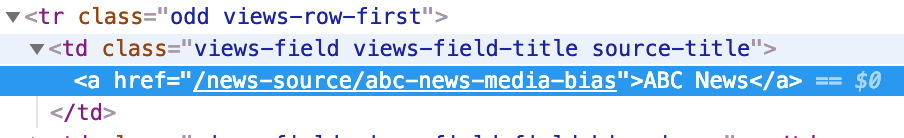

In [46]:
atag = row.select_one('.views-field.views-field-title.source-title a')

In [48]:
atag

<a href="/news-source/abc-news-media-bias">ABC News (Online)</a>

In [49]:
atag.text

'ABC News (Online)'

In [42]:
# get the text from the "a" tag inside the ".source-title" class
name = row.select_one('.views-field.views-field-title.source-title a').text
print(name)

AlterNet


In [50]:
# could also select only using the "source-title" class
row.select_one('.source-title a').text

'ABC News (Online)'

## Extracting the outlet bias 

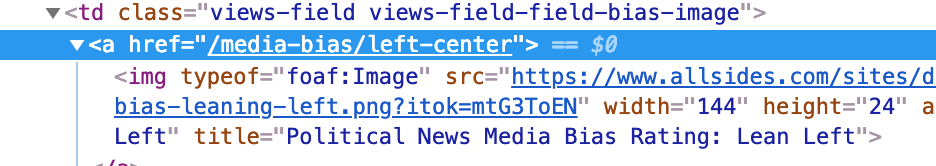

In [51]:
atag = row.select_one('.views-field.views-field-field-bias-image a')

atag

<a href="/media-bias/left-center"><img alt="AllSides Media Bias Rating: Lean Left" height="20" src="https://www.allsides.com/sites/default/files/styles/bias120x20/public/bias-leaning-left.png?itok=F7AE1uLT" title="AllSides Media Bias Rating: Lean Left" typeof="foaf:Image" width="120"/></a>

In [53]:
atag.attrs['href']

'/media-bias/left-center'

In [57]:
atag['href'].split('/')[-1]

'left-center'

In [58]:
# select tag with class "views-field-field-bias-image"
# and then get the "href" attribute of the a element

bias_raw = row.select_one('.views-field-field-bias-image a')['href']
print(bias_raw)

bias = bias_raw.split('/')[-1]
print(bias)

/media-bias/left-center
left-center


## Putting it all together

1. Loop over all rows and make a DataFrame of name and bias
1. Use seaborn to make a bar plot of the number of outlets for each bias type

In [59]:
def get_bias(row):
    """Given a row <tr> element, return the bias value."""
    bias = row.select_one('.views-field-field-bias-image a')['href']
    return bias.split('/')[-1]

def get_name(row):
    """Given a row <tr> element, return the outlet name."""
    return row.select_one('.source-title a').text

In [60]:
# Store all bias/name values
names = []
biases = []

# Select all <tr> elements in the <tbody>
rows = soup.select('tbody tr')

# Loop over all rows
for this_row in rows:
    
    # Get the outlet name for this row
    this_name = get_name(this_row)
    
    # Get the bias value for this row
    this_bias = get_bias(this_row)
    
    # Save the values to a list
    names.append(this_name)
    biases.append(this_bias)

In [61]:
names

['ABC News (Online)',
 'AlterNet',
 'Associated Press',
 'Associated Press Fact Check',
 'Axios',
 'BBC News',
 'Bloomberg',
 'Breitbart News',
 'BuzzFeed News',
 'CBS News (Online)',
 'Christian Science Monitor',
 'CNN (Online News)',
 'CNN (Opinion)',
 'Daily Beast',
 'Daily Mail',
 'Democracy Now!',
 'Forbes',
 'Fox News (Online News)',
 'Fox News (Opinion)',
 'HuffPost',
 'Insider',
 'Mother Jones',
 'MSNBC',
 'National Review',
 'NBC News (Online)',
 'New York Post (News)',
 'New York Times (News)',
 'New York Times (Opinion)',
 'NewsNation',
 'Newsweek',
 'NPR (Online News)',
 'NPR (Opinion) ',
 'Politico',
 'Reason',
 'Reuters',
 'Slate',
 'The American Spectator',
 'The Atlantic',
 'The Blaze',
 'The Daily Caller',
 'The Daily Wire',
 'The Economist',
 'The Epoch Times',
 'The Federalist',
 'The Guardian',
 'The Hill',
 'The Intercept',
 'The New Yorker',
 'Time Magazine',
 'USA TODAY']

In [62]:
biases

['left-center',
 'left',
 'left-center',
 'left-center',
 'center',
 'center',
 'left-center',
 'right',
 'left',
 'left-center',
 'center',
 'left',
 'left',
 'left',
 'right',
 'left',
 'center',
 'right',
 'right',
 'left',
 'left-center',
 'left',
 'left',
 'right',
 'left-center',
 'right-center',
 'left-center',
 'left',
 'center',
 'center',
 'left-center',
 'left-center',
 'left-center',
 'right-center',
 'center',
 'left',
 'right',
 'left-center',
 'right',
 'right',
 'right',
 'left-center',
 'right-center',
 'right',
 'left-center',
 'center',
 'left',
 'left',
 'left-center',
 'left-center']

In [63]:
# Convert to a dataframe
data = {'name':names, 'bias':biases}
df = pd.DataFrame(data)

In [64]:
df.head()

name         bias
0            ABC News (Online)  left-center
1                     AlterNet         left
2             Associated Press  left-center
3  Associated Press Fact Check  left-center
4                        Axios       center

## Let's plot the results

In [65]:
# group by bias
N = df.groupby("bias", as_index=False).size()

N

bias  size
0        center     8
1          left    13
2   left-center    16
3         right    10
4  right-center     3

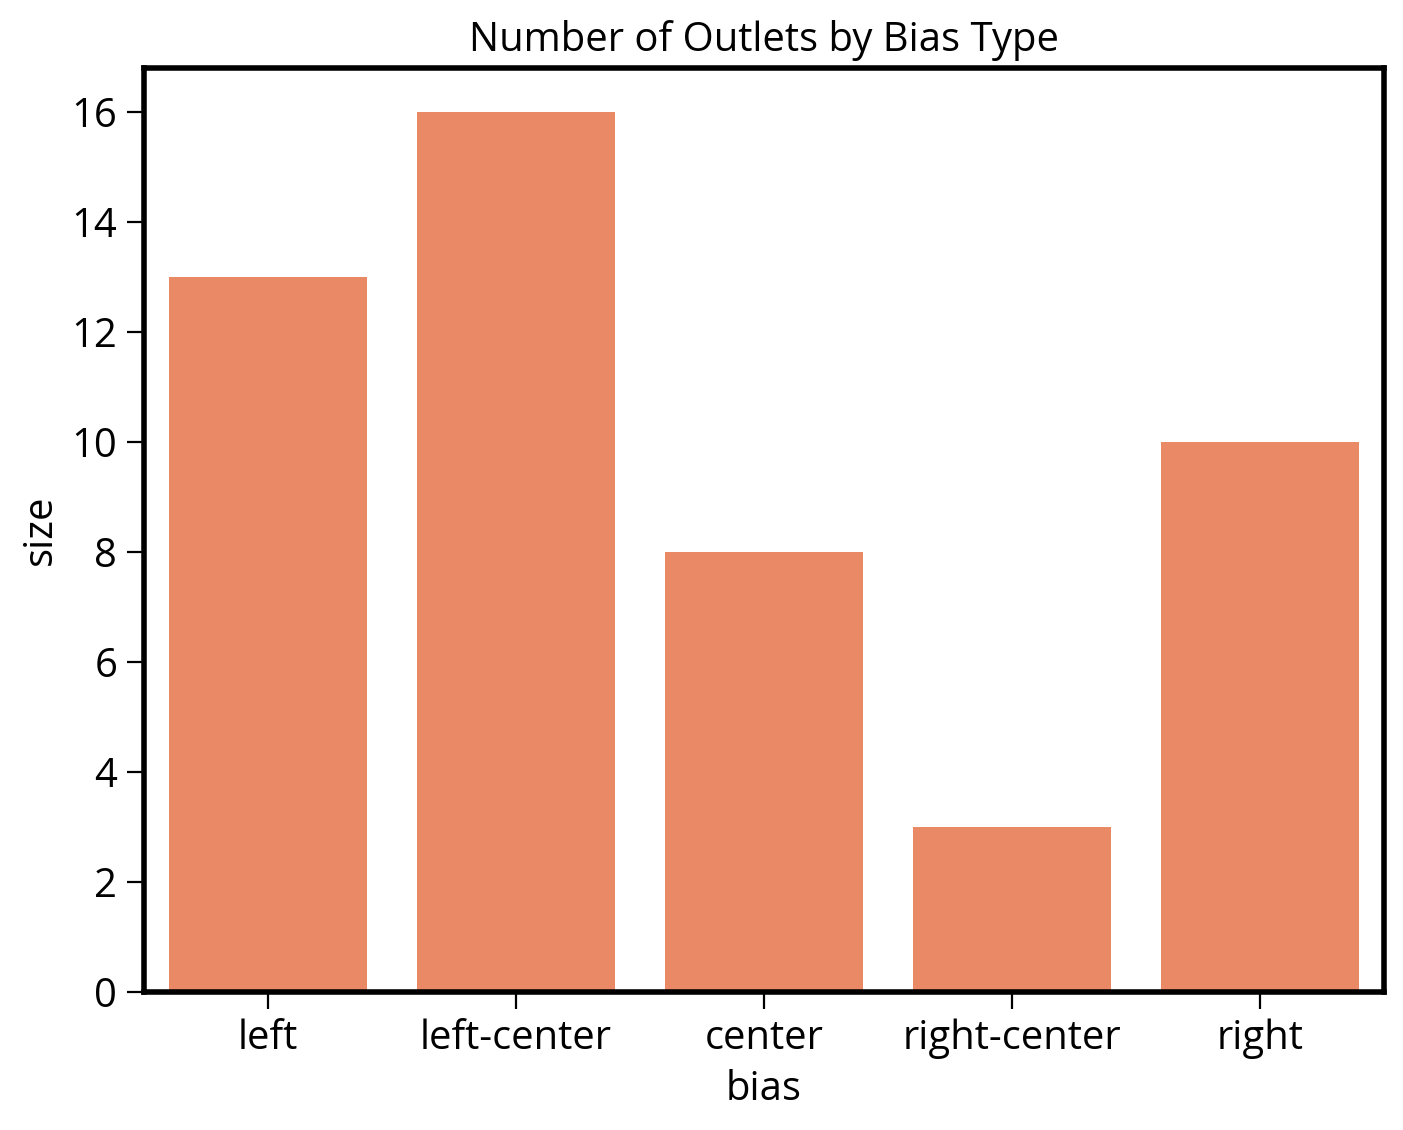

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

# Make a bar plot, ordering the x axis
sns.barplot(
    x=N['bias'],
    y=N['size'],
    color="coral",
    order=["left", "left-center", "center", "right-center", "right"],
    ax=ax,
    orient="vertical"
)
ax.set_title("Number of Outlets by Bias Type");

In [67]:
#the right 
df.loc[df['bias'] == 'right']

name   bias
7           Breitbart News  right
14              Daily Mail  right
17  Fox News (Online News)  right
18      Fox News (Opinion)  right
23         National Review  right
36  The American Spectator  right
38               The Blaze  right
39        The Daily Caller  right
40          The Daily Wire  right
43          The Federalist  right

In [68]:
# the left
df.loc[df['bias'] == 'left']

name  bias
1                   AlterNet  left
8              BuzzFeed News  left
11         CNN (Online News)  left
12             CNN (Opinion)  left
13               Daily Beast  left
15            Democracy Now!  left
19                  HuffPost  left
21              Mother Jones  left
22                     MSNBC  left
27  New York Times (Opinion)  left
35                     Slate  left
46             The Intercept  left
47            The New Yorker  left

## Next time: dynamic content!